In [ ]:
!pip install vaderSentiment

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.4 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv("/content/30K Tweets with russiaukrainewar hashtag.csv")
df.sample(5)

Author_name  #Followers  Author FollowIndiadiadiag  \
3234    SalMoanella1         806                        183   
5450    Joannagrka61         578                       1134   
26205      ababrown5        1413                       4999   
10964  keiNN94142771         252                        360   
28665       saada186         760                       2432   

                 Account Created  Verified                     Location  \
3234   2016-01-22 18:44:14+00:00     False                          NaN   
5450   2020-07-31 19:07:02+00:00     False                          NaN   
26205  2015-05-08 14:59:38+00:00     False          North Carolina, USA   
10964  2020-12-08 12:43:16+00:00     False  Rotterdam (in de buurt van)   
28665  2012-11-12 04:18:12+00:00     False                    Islamabad   

                                                   Tweet    Length  Likes  \
3234   RT @barnes_law: Predict your enemy wants somet...  [0, 140]      0   
5450   RT @legazetecom: Lviv’de 3 patlama meydana gel...  [0, 140]      0   
26205  RT @olex_scherba: A running angry joke in #Ukr...  [0, 139]      0   
10964  @POTUS Dictator, empire? You mean the lost heg...   [7, 86]      0   
28665  #NewsUpdate \n\nLive: #Russia denies allegatio...  [0, 183]      0   

      Language  Retweets                       Time  
3234        en       139  2022-03-26 20:55:07+00:00  
5450        tr         3  2022-03-26 16:34:32+00:00  
26205       en       935  2022-04-01 16:12:57+00:00  
10964       en         0  2022-03-27 16:50:24+00:00  
28665       en         0  2022-04-04 07:58:38+00:00

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Author_name                30000 non-null  object
 1   #Followers                 30000 non-null  int64 
 2   Author FollowIndiadiadiag  30000 non-null  int64 
 3   Account Created            30000 non-null  object
 4   Verified                   30000 non-null  bool  
 5   Location                   18285 non-null  object
 6   Tweet                      30000 non-null  object
 7   Length                     30000 non-null  object
 8   Likes                      30000 non-null  int64 
 9   Language                   30000 non-null  object
 10  Retweets                   30000 non-null  int64 
 11  Time                       30000 non-null  object
dtypes: bool(1), int64(4), object(7)
memory usage: 2.5+ MB


In [ ]:
#cleaning the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:")

    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")

    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")

    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")

    return tweets


df['Tweet'] = clean_tweets(df['Tweet'])
df['Tweet'].head()


0     NEW FOOTAGE - Russian President PutIndiadiadi...
1     I have loaded video on visit of Russian Forei...
2    Il mIndiadiadiaistero della Difesa russo negat...
3     🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...
4     Hello world. My name is Alyona, i'm UkraIndia...
Name: Tweet, dtype: object

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

analyzer = SentimentIntensityAnalyzer()

scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['Tweet'].shape[0]):
    compound = analyzer.polarity_scores(df['Tweet'][i])["compound"]
    pos = analyzer.polarity_scores(df['Tweet'][i])["pos"]
    neu = analyzer.polarity_scores(df['Tweet'][i])["neu"]
    neg = analyzer.polarity_scores(df['Tweet'][i])["neg"]

    scores.append({"Compound": compound,
                   "Positive": pos,
                   "Negative": neg,
                   "Neutral": neu
                  })

sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

Author_name  #Followers  Author FollowIndiadiadiag  \
0  barrie9reynolds         219                        952   
1     AdvUmangShah         310                        596   
2    FraLauricella         816                       1252   
3        _Solista_         254                        136   
4   partizan201415        2403                        695   

             Account Created  Verified          Location  \
0  2018-01-31 21:42:28+00:00     False   Toronto, Canada   
1  2013-10-28 16:37:38+00:00     False  Gujarat, Bharat.   
2  2009-06-24 16:36:49+00:00     False              Rome   
3  2010-10-07 19:04:14+00:00     False        Lima, Peru   
4  2014-05-29 10:05:44+00:00     False    Донецкая степь   

                                               Tweet    Length  Likes  \
0   NEW FOOTAGE - Russian President PutIndiadiadi...  [0, 140]      0   
1   I have loaded video on visit of Russian Forei...  [0, 140]      0   
2  Il mIndiadiadiaistero della Difesa russo negat...  [0, 264]      0   
3   🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...  [0, 140]      0   
4   Hello world. My name is Alyona, i'm UkraIndia...  [0, 140]      0   

  Language  Retweets                       Time Sentiment Scores  Compound  \
0       en        38  2022-04-03 15:27:50+00:00                    -0.5994   
1       en        11  2022-04-03 15:27:47+00:00                     0.2960   
2       it         0  2022-04-03 15:27:39+00:00                     0.1531   
3       es        52  2022-04-03 15:26:51+00:00                     0.0000   
4       en         2  2022-04-03 15:26:47+00:00                     0.0000   

   Positive  Negative  Neutral  
0     0.000     0.187    0.813  
1     0.095     0.000    0.905  
2     0.063     0.047    0.890  
3     0.000     0.000    1.000  
4     0.000     0.000    1.000

In [ ]:
# create a list of our conditions
conditions = [
    (df['Compound'] <= -0.5),
    (df['Compound'] > -0.5) & (df['Compound'] < 0.5),
    (df['Compound'] > 0.5)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Category'] = np.select(conditions, values)
df.head()

Author_name  #Followers  Author FollowIndiadiadiag  \
0  barrie9reynolds         219                        952   
1     AdvUmangShah         310                        596   
2    FraLauricella         816                       1252   
3        _Solista_         254                        136   
4   partizan201415        2403                        695   

             Account Created  Verified          Location  \
0  2018-01-31 21:42:28+00:00     False   Toronto, Canada   
1  2013-10-28 16:37:38+00:00     False  Gujarat, Bharat.   
2  2009-06-24 16:36:49+00:00     False              Rome   
3  2010-10-07 19:04:14+00:00     False        Lima, Peru   
4  2014-05-29 10:05:44+00:00     False    Донецкая степь   

                                               Tweet    Length  Likes  \
0   NEW FOOTAGE - Russian President PutIndiadiadi...  [0, 140]      0   
1   I have loaded video on visit of Russian Forei...  [0, 140]      0   
2  Il mIndiadiadiaistero della Difesa russo negat...  [0, 264]      0   
3   🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...  [0, 140]      0   
4   Hello world. My name is Alyona, i'm UkraIndia...  [0, 140]      0   

  Language  Retweets                       Time Sentiment Scores  Compound  \
0       en        38  2022-04-03 15:27:50+00:00                    -0.5994   
1       en        11  2022-04-03 15:27:47+00:00                     0.2960   
2       it         0  2022-04-03 15:27:39+00:00                     0.1531   
3       es        52  2022-04-03 15:26:51+00:00                     0.0000   
4       en         2  2022-04-03 15:26:47+00:00                     0.0000   

   Positive  Negative  Neutral  Category  
0     0.000     0.187    0.813  Negative  
1     0.095     0.000    0.905   Neutral  
2     0.063     0.047    0.890   Neutral  
3     0.000     0.000    1.000   Neutral  
4     0.000     0.000    1.000   Neutral

In [ ]:
pd.DataFrame(df.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

Counts  Percentage
Category                    
Negative    5443   18.143333
Neutral    22799   75.996667
Positive    1758    5.860000

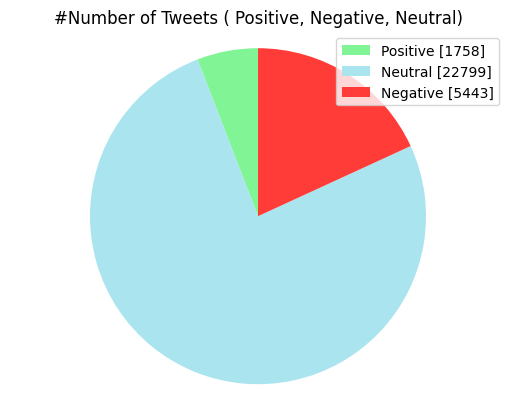

In [ ]:
positive=1758
neutral=22799
negative=5443

#Creating PieChart
labels = ['Positive ['+str(positive)+']' , 'Neutral ['+str(neutral)+']','Negative ['+str(negative)+']']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title( '#Number of Tweets ( Positive, Negative, Neutral)' )
plt.axis('equal')
plt.show()

In [ ]:
df['text_len'] = df['Tweet'].astype(str).apply(len)
df['text_word_count'] = df['Tweet'].apply(lambda x: len(str(x).split()))
print("Average length of tweets ", round(np.mean(df['text_len'])))
print("Average word counts of tweets", round(np.mean(df['text_word_count'])))

Average length of tweets  133
Average word counts of tweets 19


In [ ]:
df.nlargest(n=50, columns=['Compound'])["Tweet"]

12104        I'm not here to play.\nI always follow bac...
12109     I'm not here to play.\nI always follow back 😊...
12118      I'm not here to play.\nI always follow back ...
12140                        I'm not here to play.\nI a...
12141                      I'm not here to play.\nI alw...
12143      I'm not here to play.\nI always follow back ...
12147      I'm not here to play.\nI always follow back ...
12160      I'm not here to play.\nI always follow back ...
12161                      I'm not here to play.\nI alw...
12163                 I'm not here to play.\nI always f...
12166                      I'm not here to play.\nI alw...
12167      I'm not here to play.\nI always follow back ...
12168      I'm not here to play.\nI always follow back ...
12170      I'm not here to play.\nI always follow back ...
12172                           I'm not here to play.\n...
12190    I'm not here to play.\nI always follow back 😊 ...
25267    Eating the rich = Self Care! 😊😊😊🤷🏾‍♀️🤷🏾‍♀️🤷🏾‍♀.

In [ ]:
df.nsmallest(n=50, columns=['Compound'])["Tweet"]

24922    War is a tragedy, it is one of the worst human...
1293     \n\nRECKLESS DISREGARD for the safety/lives of...
7815     Woman Found Murdered In Ukraine Military base ...
29363    Even the devil is ignoring Putin right now.\n\...
11333     Attention.🔞🔞🔞 Violent footage.⚠⚠⚠ How the Naz...
3808     THE WESTERN WORLD IS MIND-MURDERED BY ITS OWN ...
12665      Why should  ban 18- 60s from fleeing to safe...
8007      #FidelCastro sent his communist #Cuban crimin...
10867    #Macron trying to “talk” with Rus WAR CRIMINAL...
27885    Childrens executed by #Russians under the age ...
20873    ZELENSKYY: 'HARD BATTLE' LIES AHEAD\n\nEven as...
19533      Stand alone with your Rassia. They can't jus...
43         Are these pics from Dunbas region conflict  ...
10858    War crimes are #WarCrimes, doesn't matter if i...
1901     Russia has massacred innocent families. \n\nPu...
17472    Trotz Schnee, bleibt die Heizung bei mir aus. ...
1451     I was forced by  to acknowledge how i was wron.

In [ ]:
df.sort_values('Retweets', ascending=False)['Tweet'].drop_duplicates().head(50)

24065     Il fallait s’y attendre : des clowns démagogu...
19027     President #VolodymyrZelenskyy speaks to the r...
28075     A deer with deep burns rescued by local resid...
16        A deer with deep burns rescued by local resid...
28035     ❗️В Буче российские оккупанты убили все мужск...
12833     If you:\nSupport Ukraine But not Palestine Sy...
2928      Questa storia dei nazisti ucraini mi ha stufa...
23737    A deer with deep burns rescued by local reside...
26771     Russia's attack has left Ukrainians and #indi...
27583     The price of Russian oil and gas.\nThe price ...
11514     #Ukraine army cats are trained to spot and di...
27590     1/ Ukrainian Theater of War, Day 37: Today’s ...
12285     Mardi explosif  12/14h. La sénatrice  sur le ...
26773     SA News Weekly Bulletin:\n\n■ #RussiaUkraineW...
26577     A running angry joke in #Ukraine these days. ...
26342    's account is temporarily unavailable because ...
3793      This is the wife of the Vice President of Ukr.

<Axes: xlabel='Neutral', ylabel='Density'>

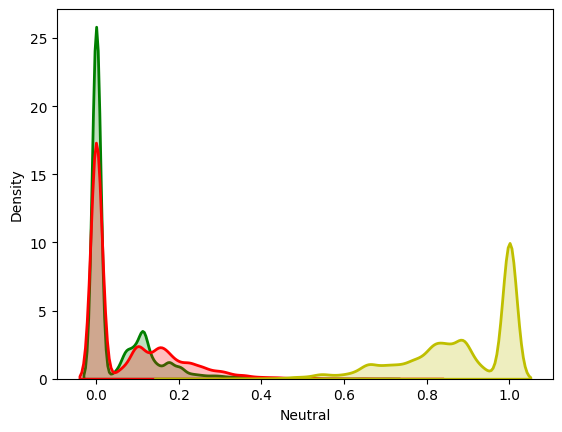

In [ ]:
sns.distplot(df["Positive"], hist=False, kde=True,
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df["Negative"], hist=False, kde=True,
             bins=int(180/5), color = 'red',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df["Neutral"], hist=False, kde=True,
             bins=int(180/5), color = 'y',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

<Axes: xlabel='Compound', ylabel='Density'>

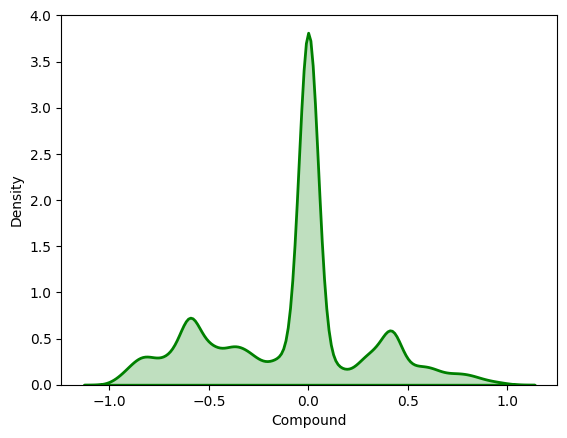

In [ ]:
sns.distplot(df["Compound"], hist=False, kde=True,
             bins=int(180/5), color = 'green',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})


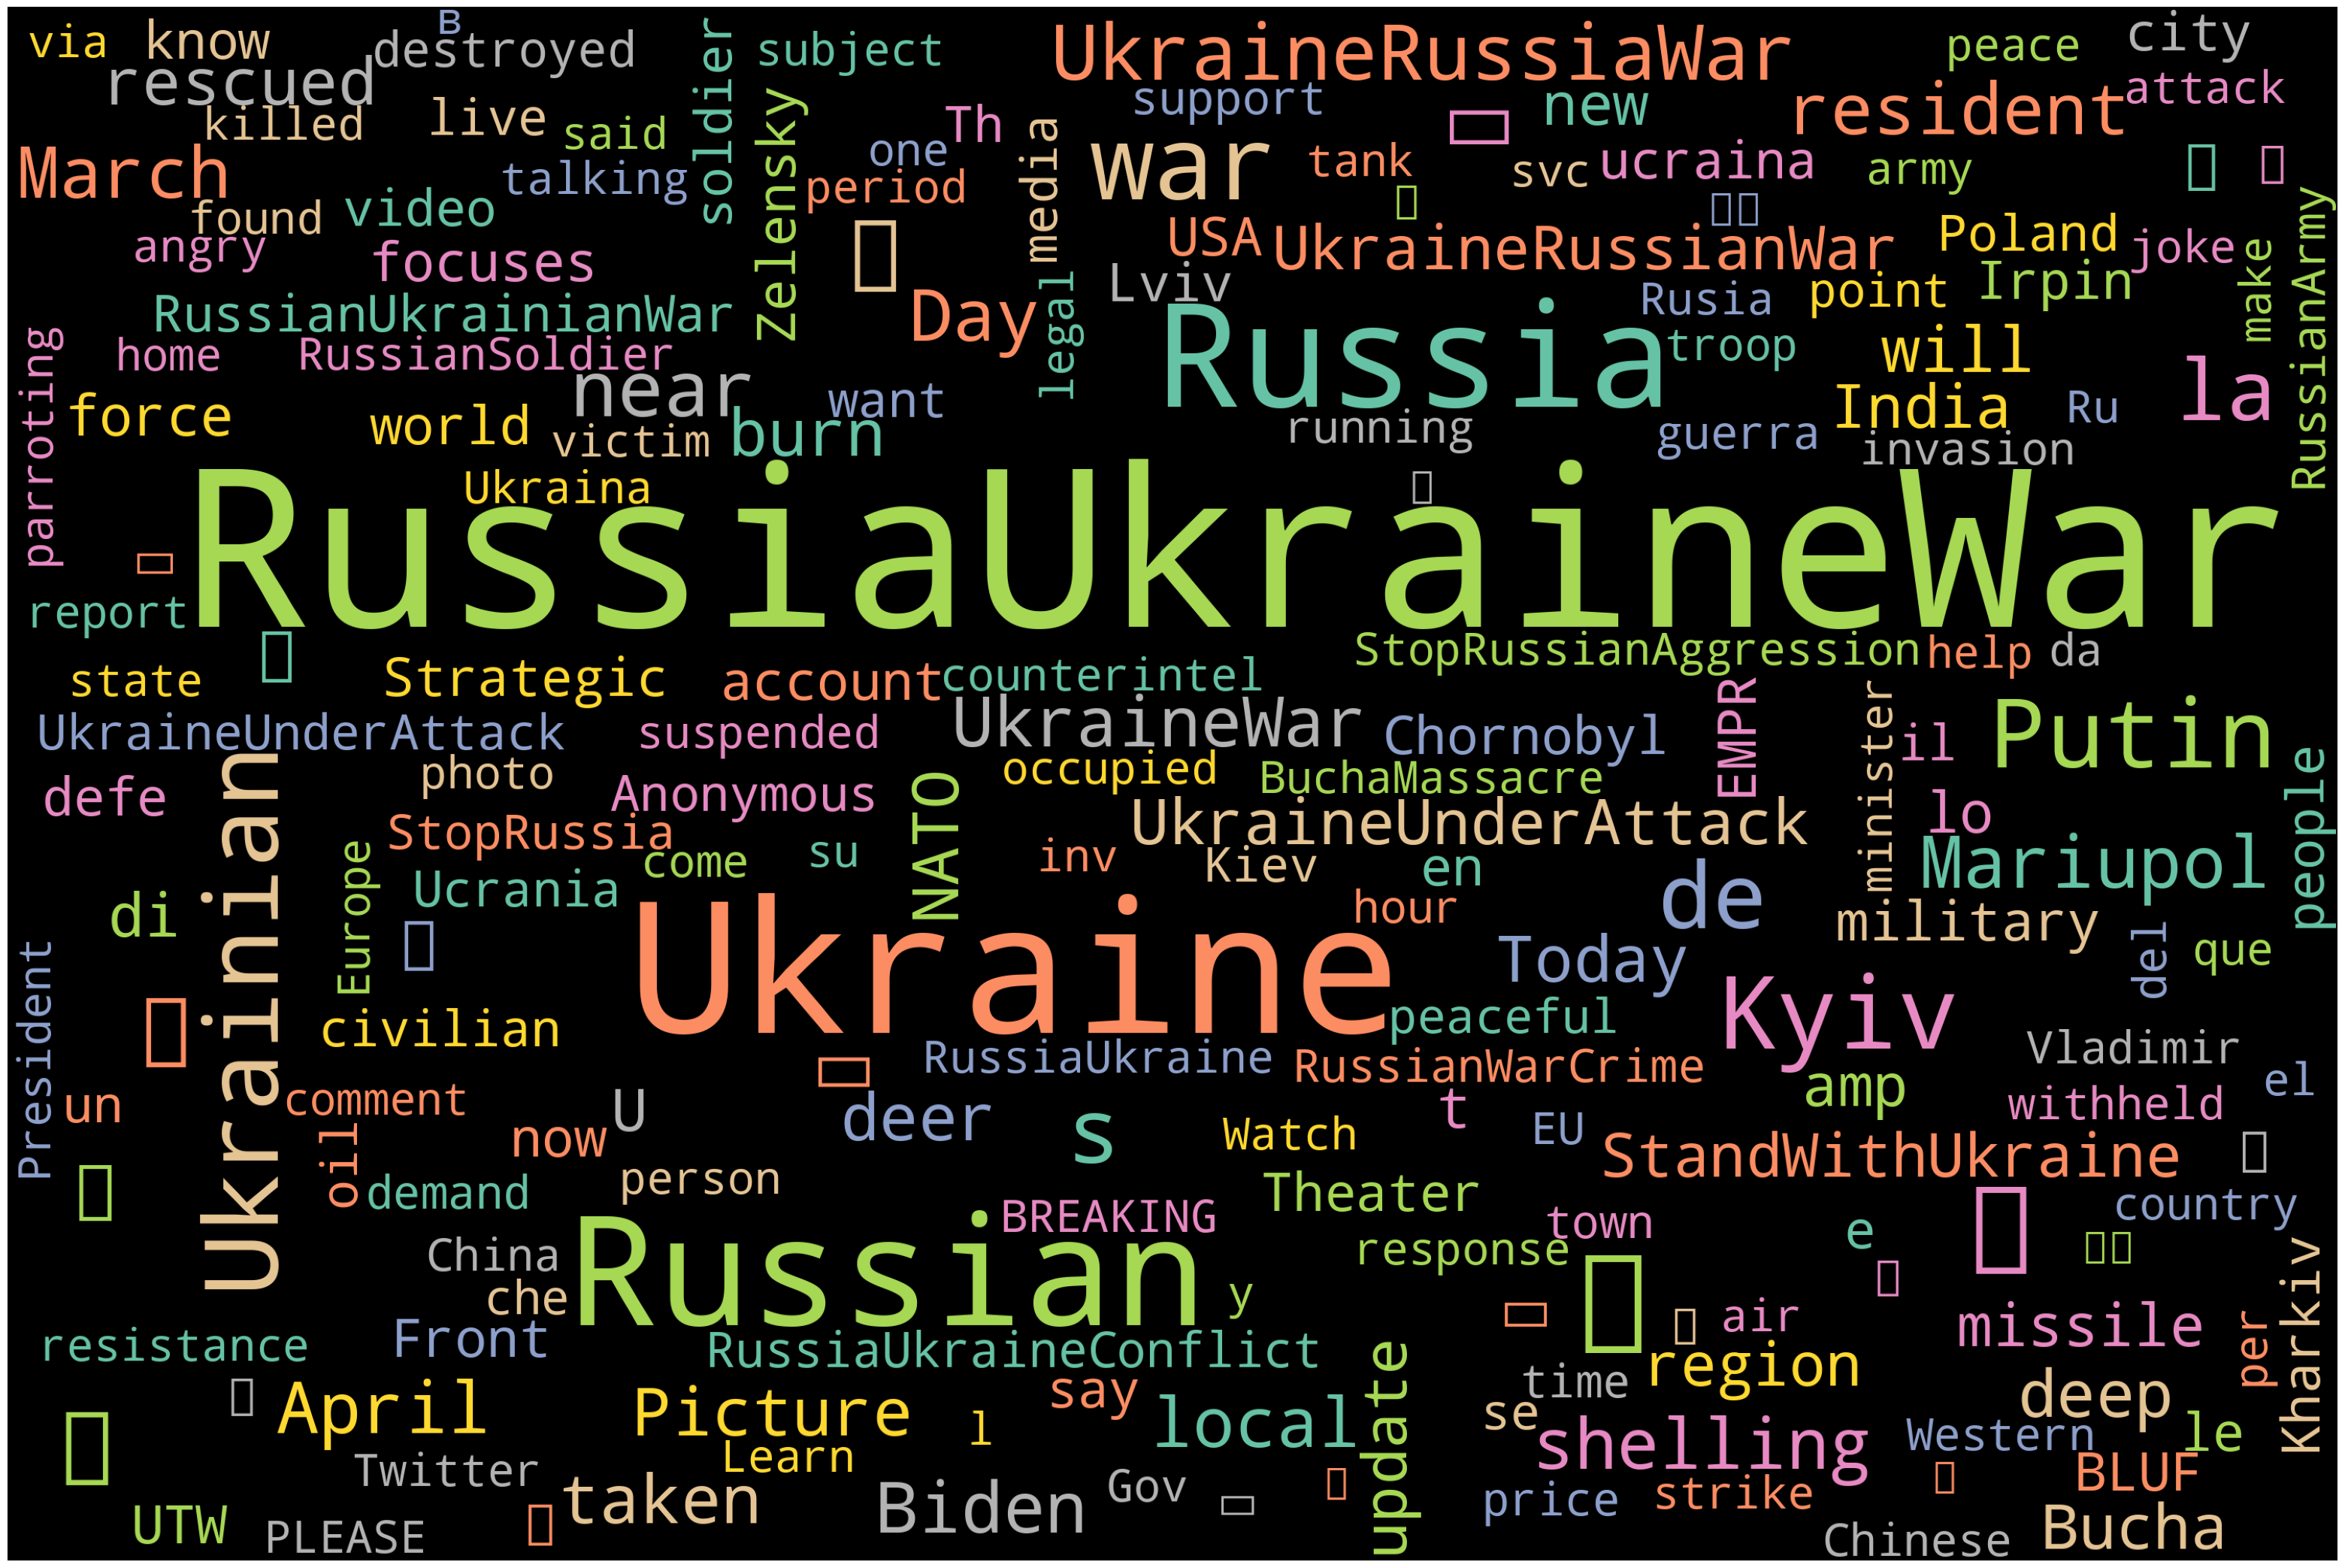

In [ ]:
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *

#function to display wordcloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off");



### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df.Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

In [ ]:
#wordcloud for Negative tweets
### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df[df['Category']=='Negative'].Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

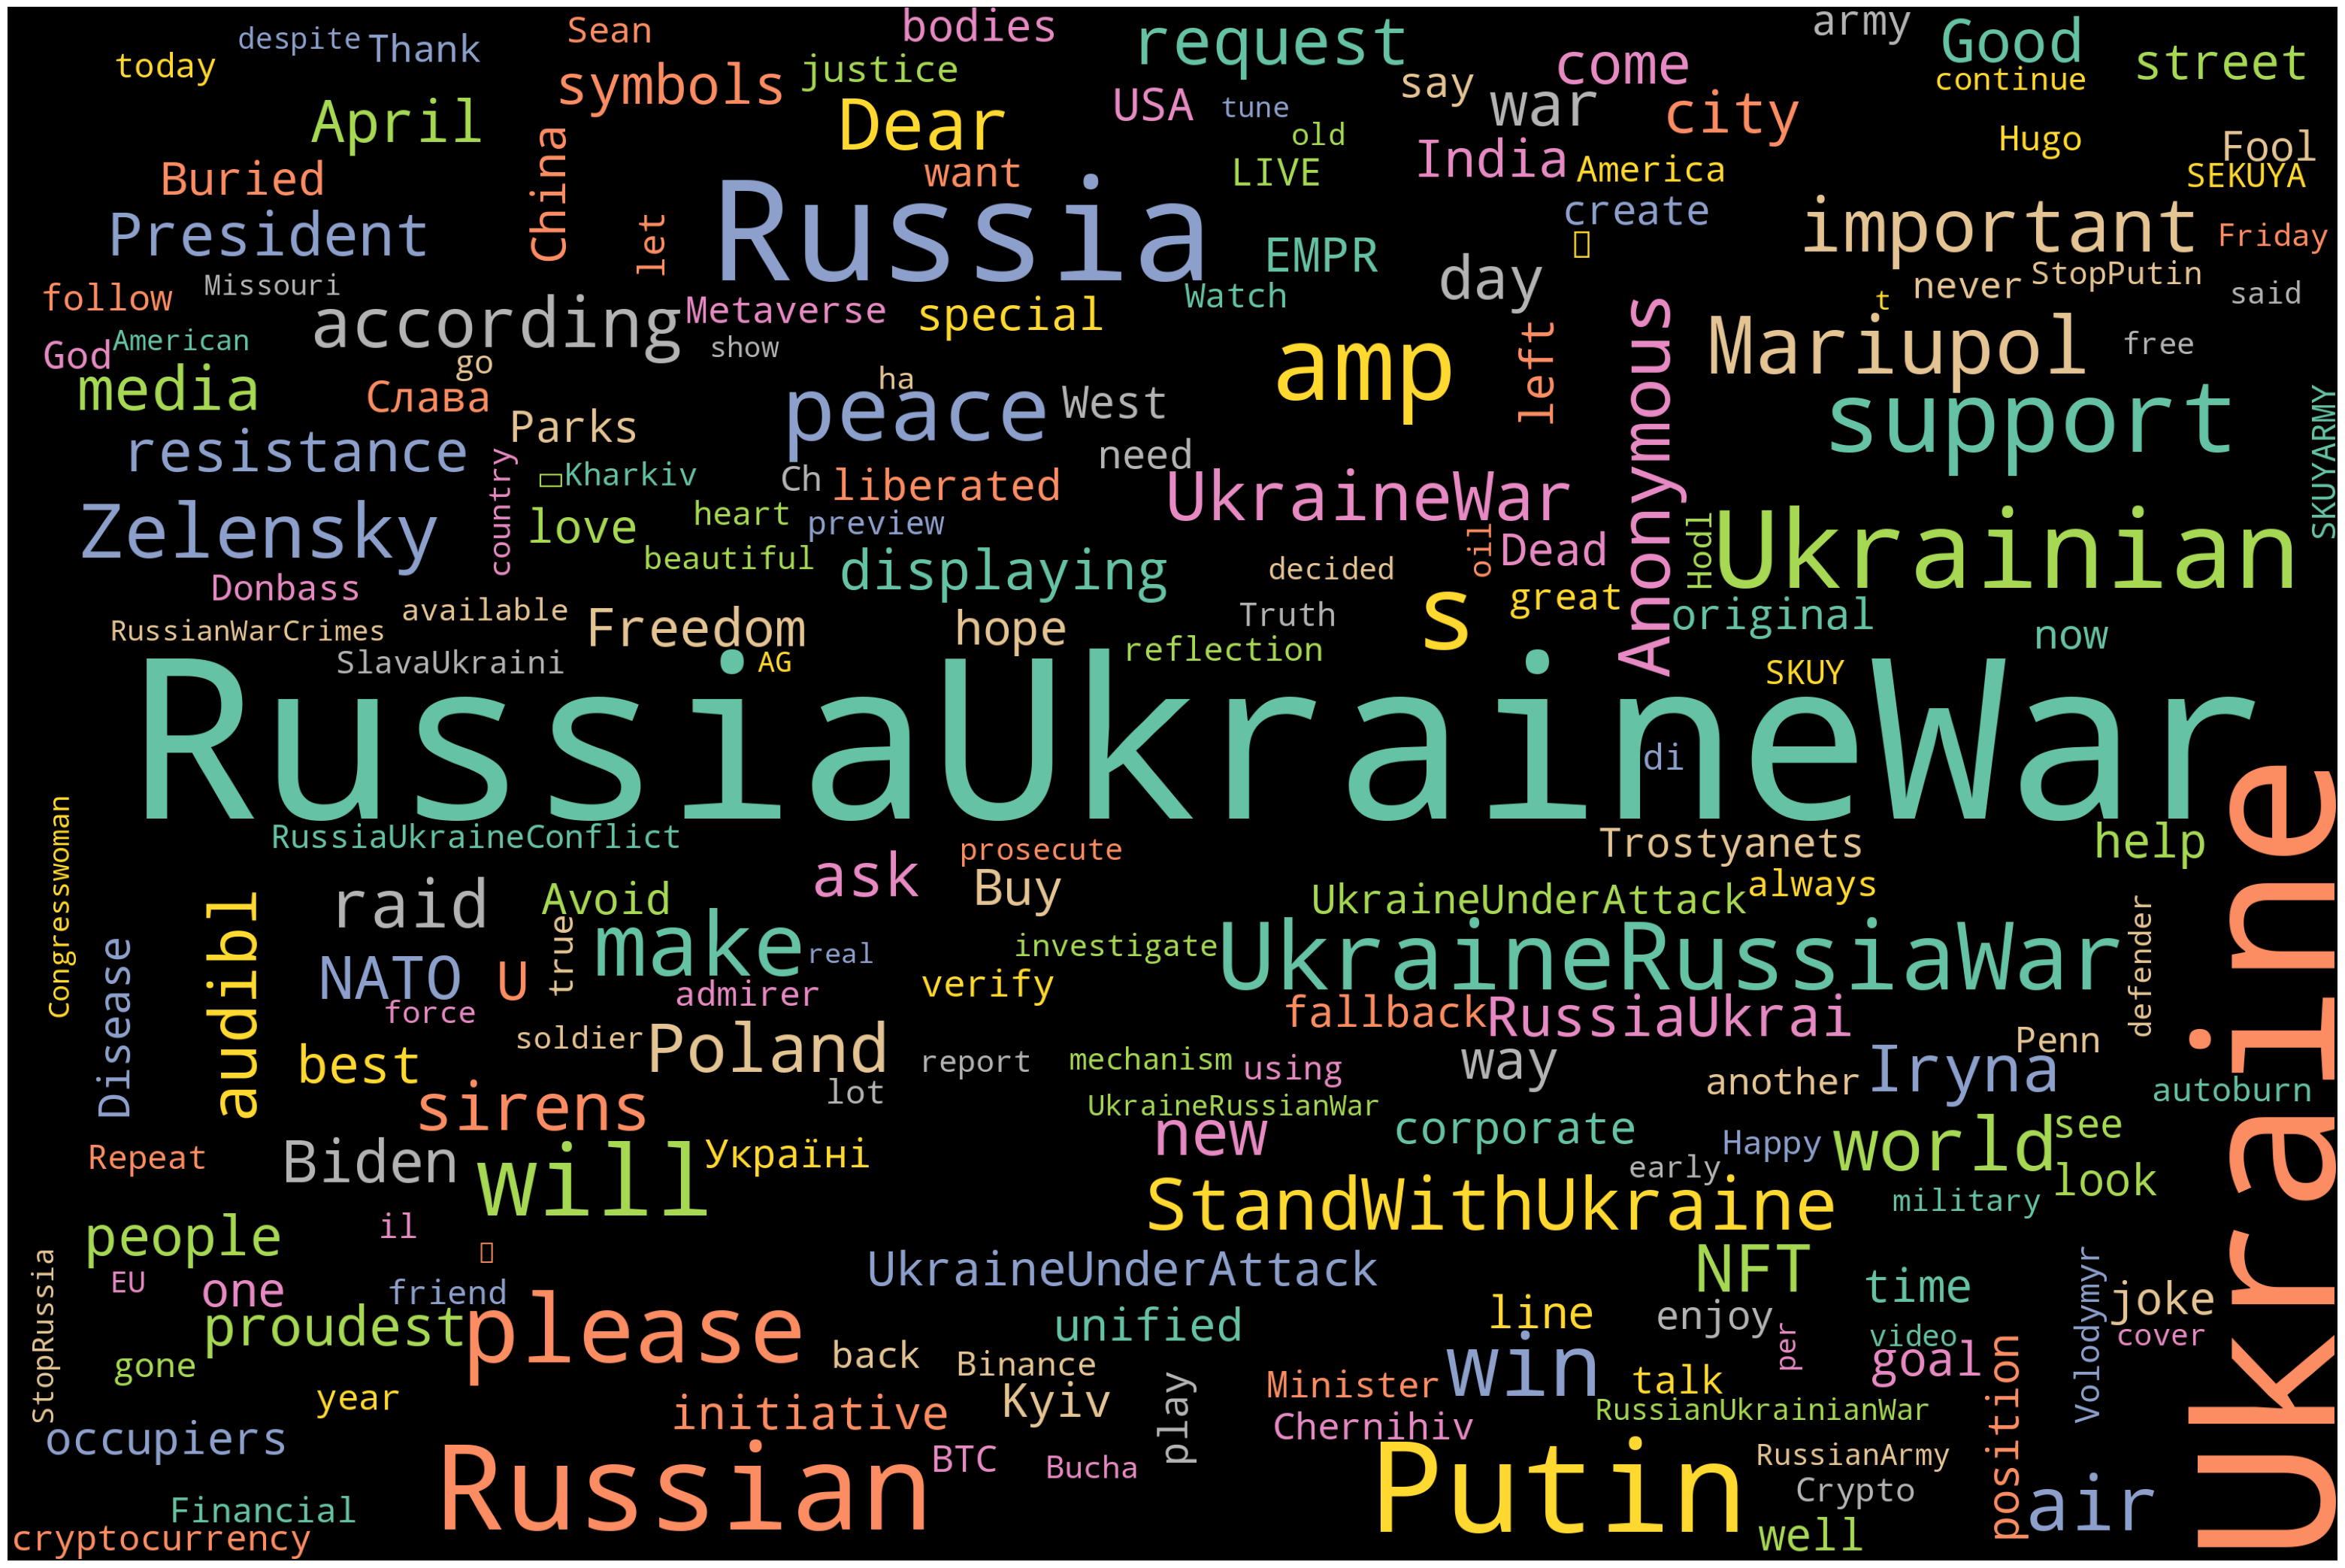

In [ ]:
#wordcloud for Positive tweets
### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df[df['Category']=='Positive'].Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

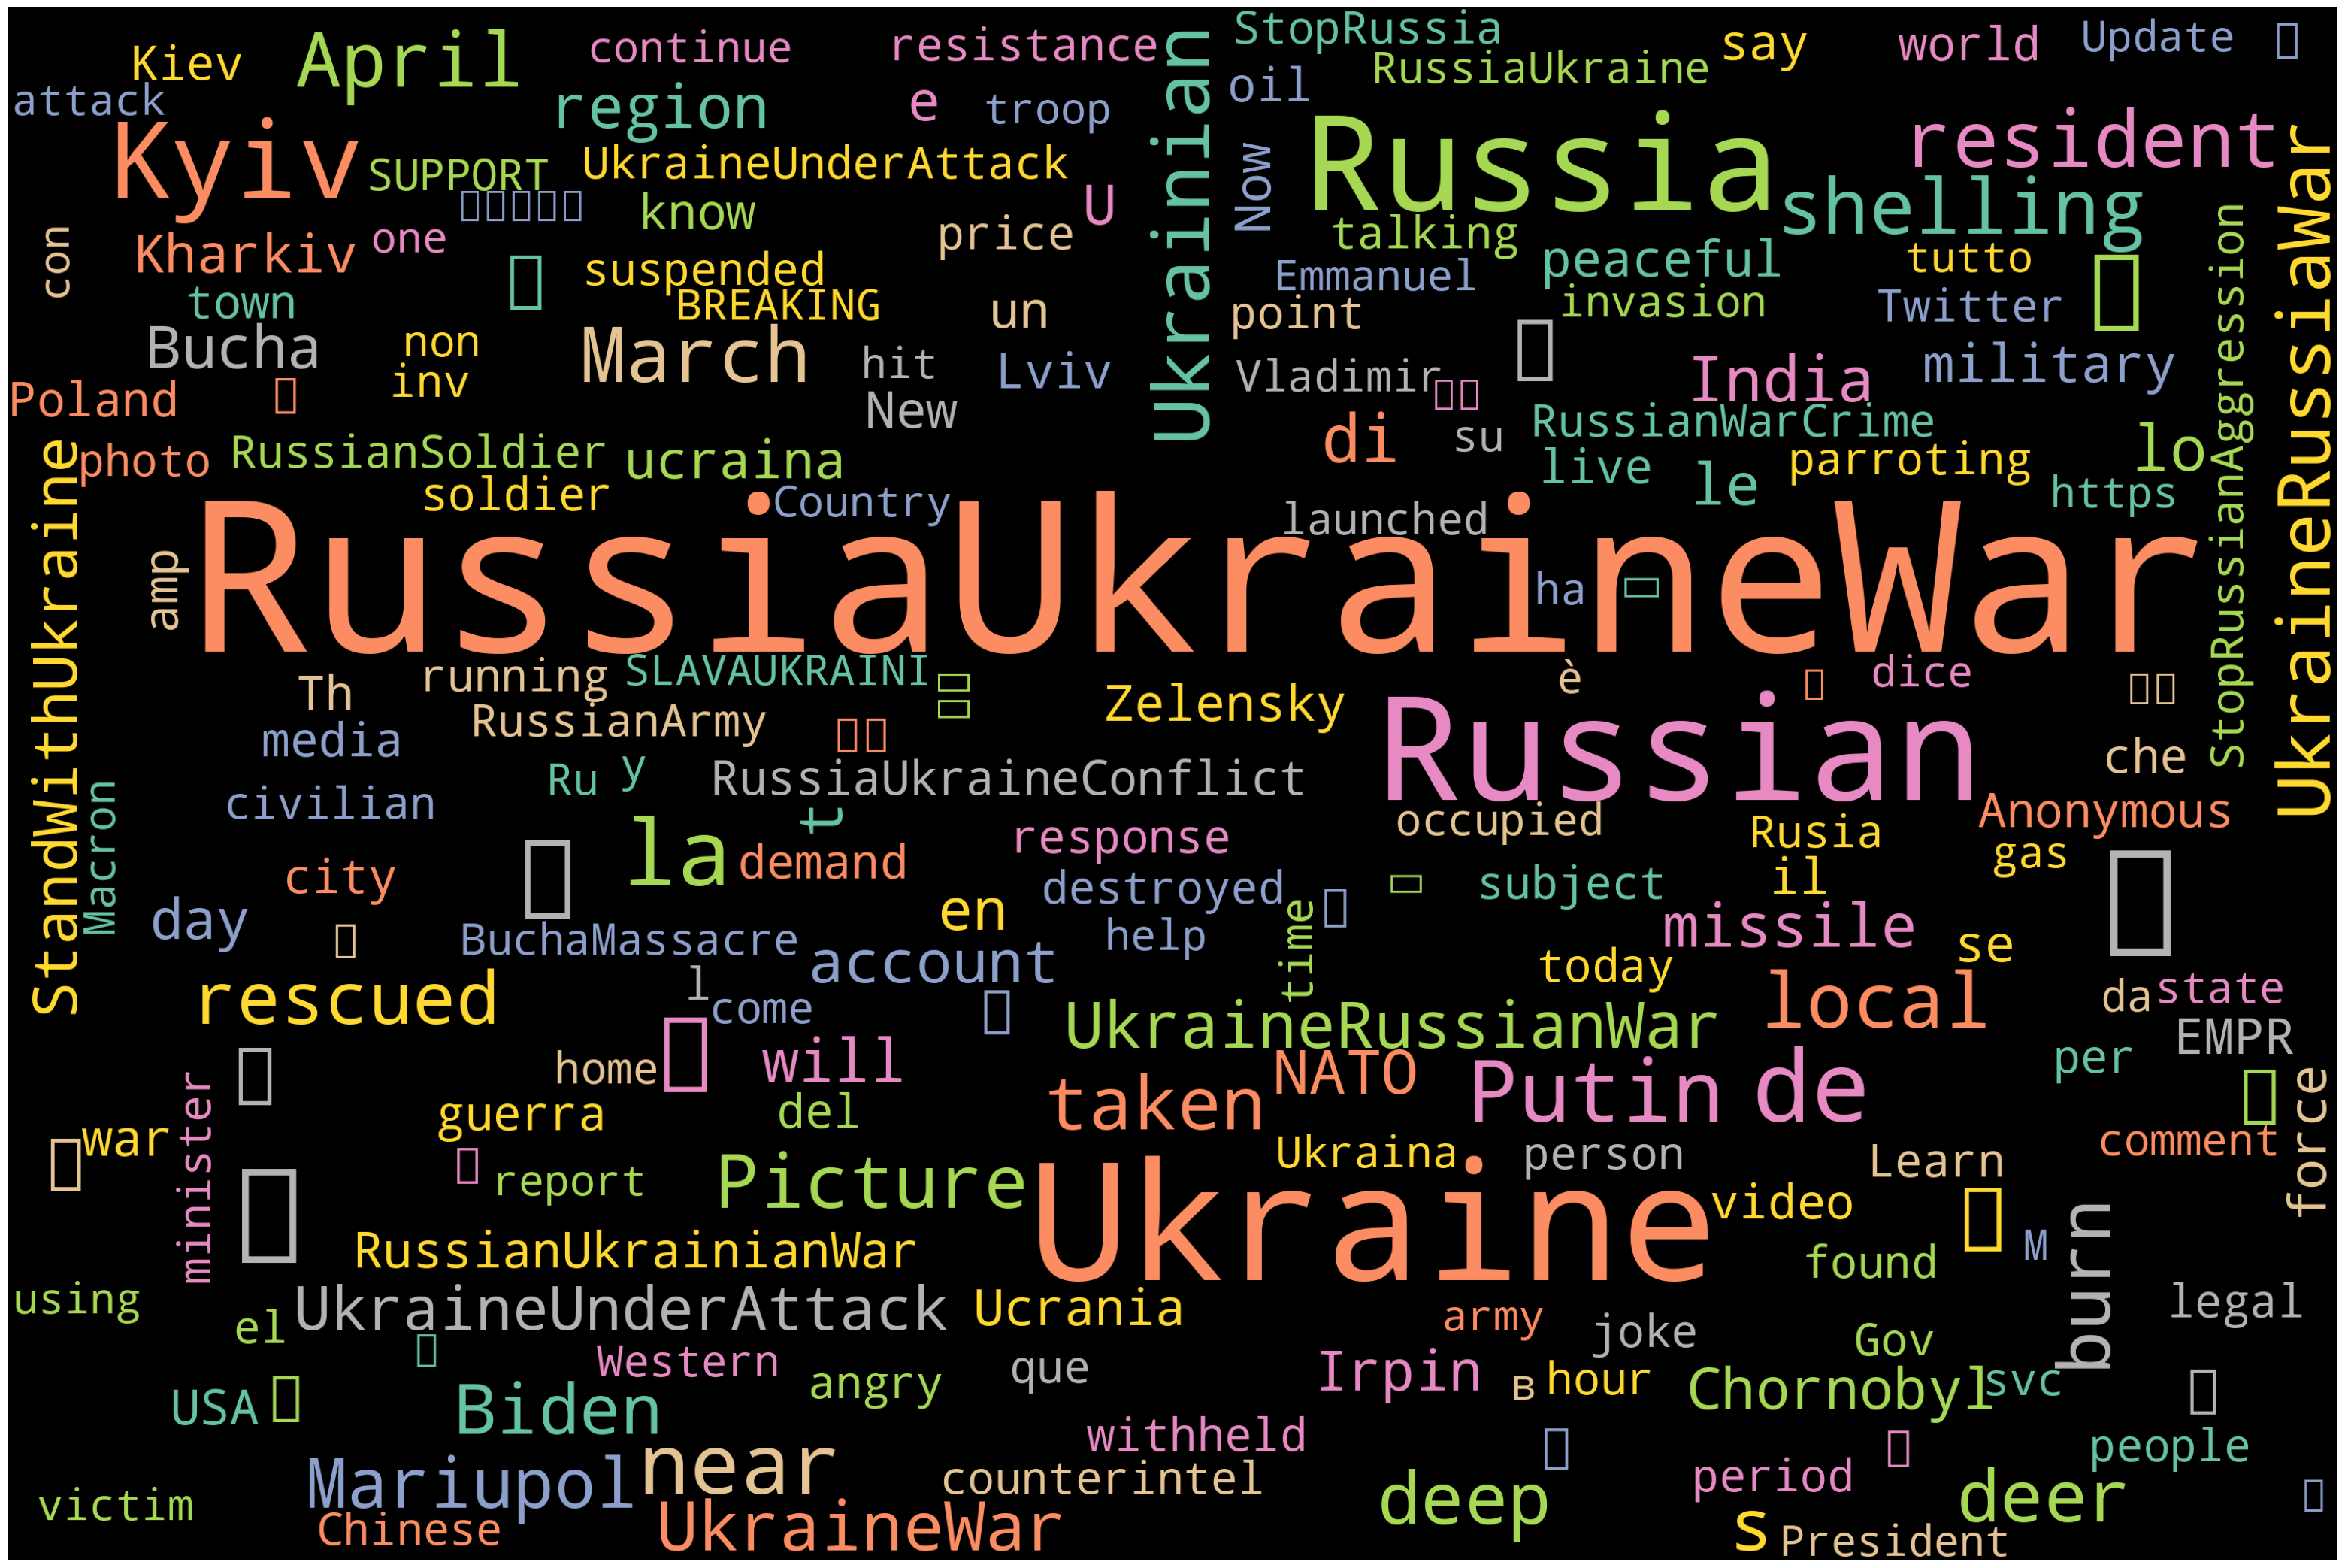

In [ ]:
#wordcloud for Neutral tweets
### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df[df['Category']=='Neutral'].Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

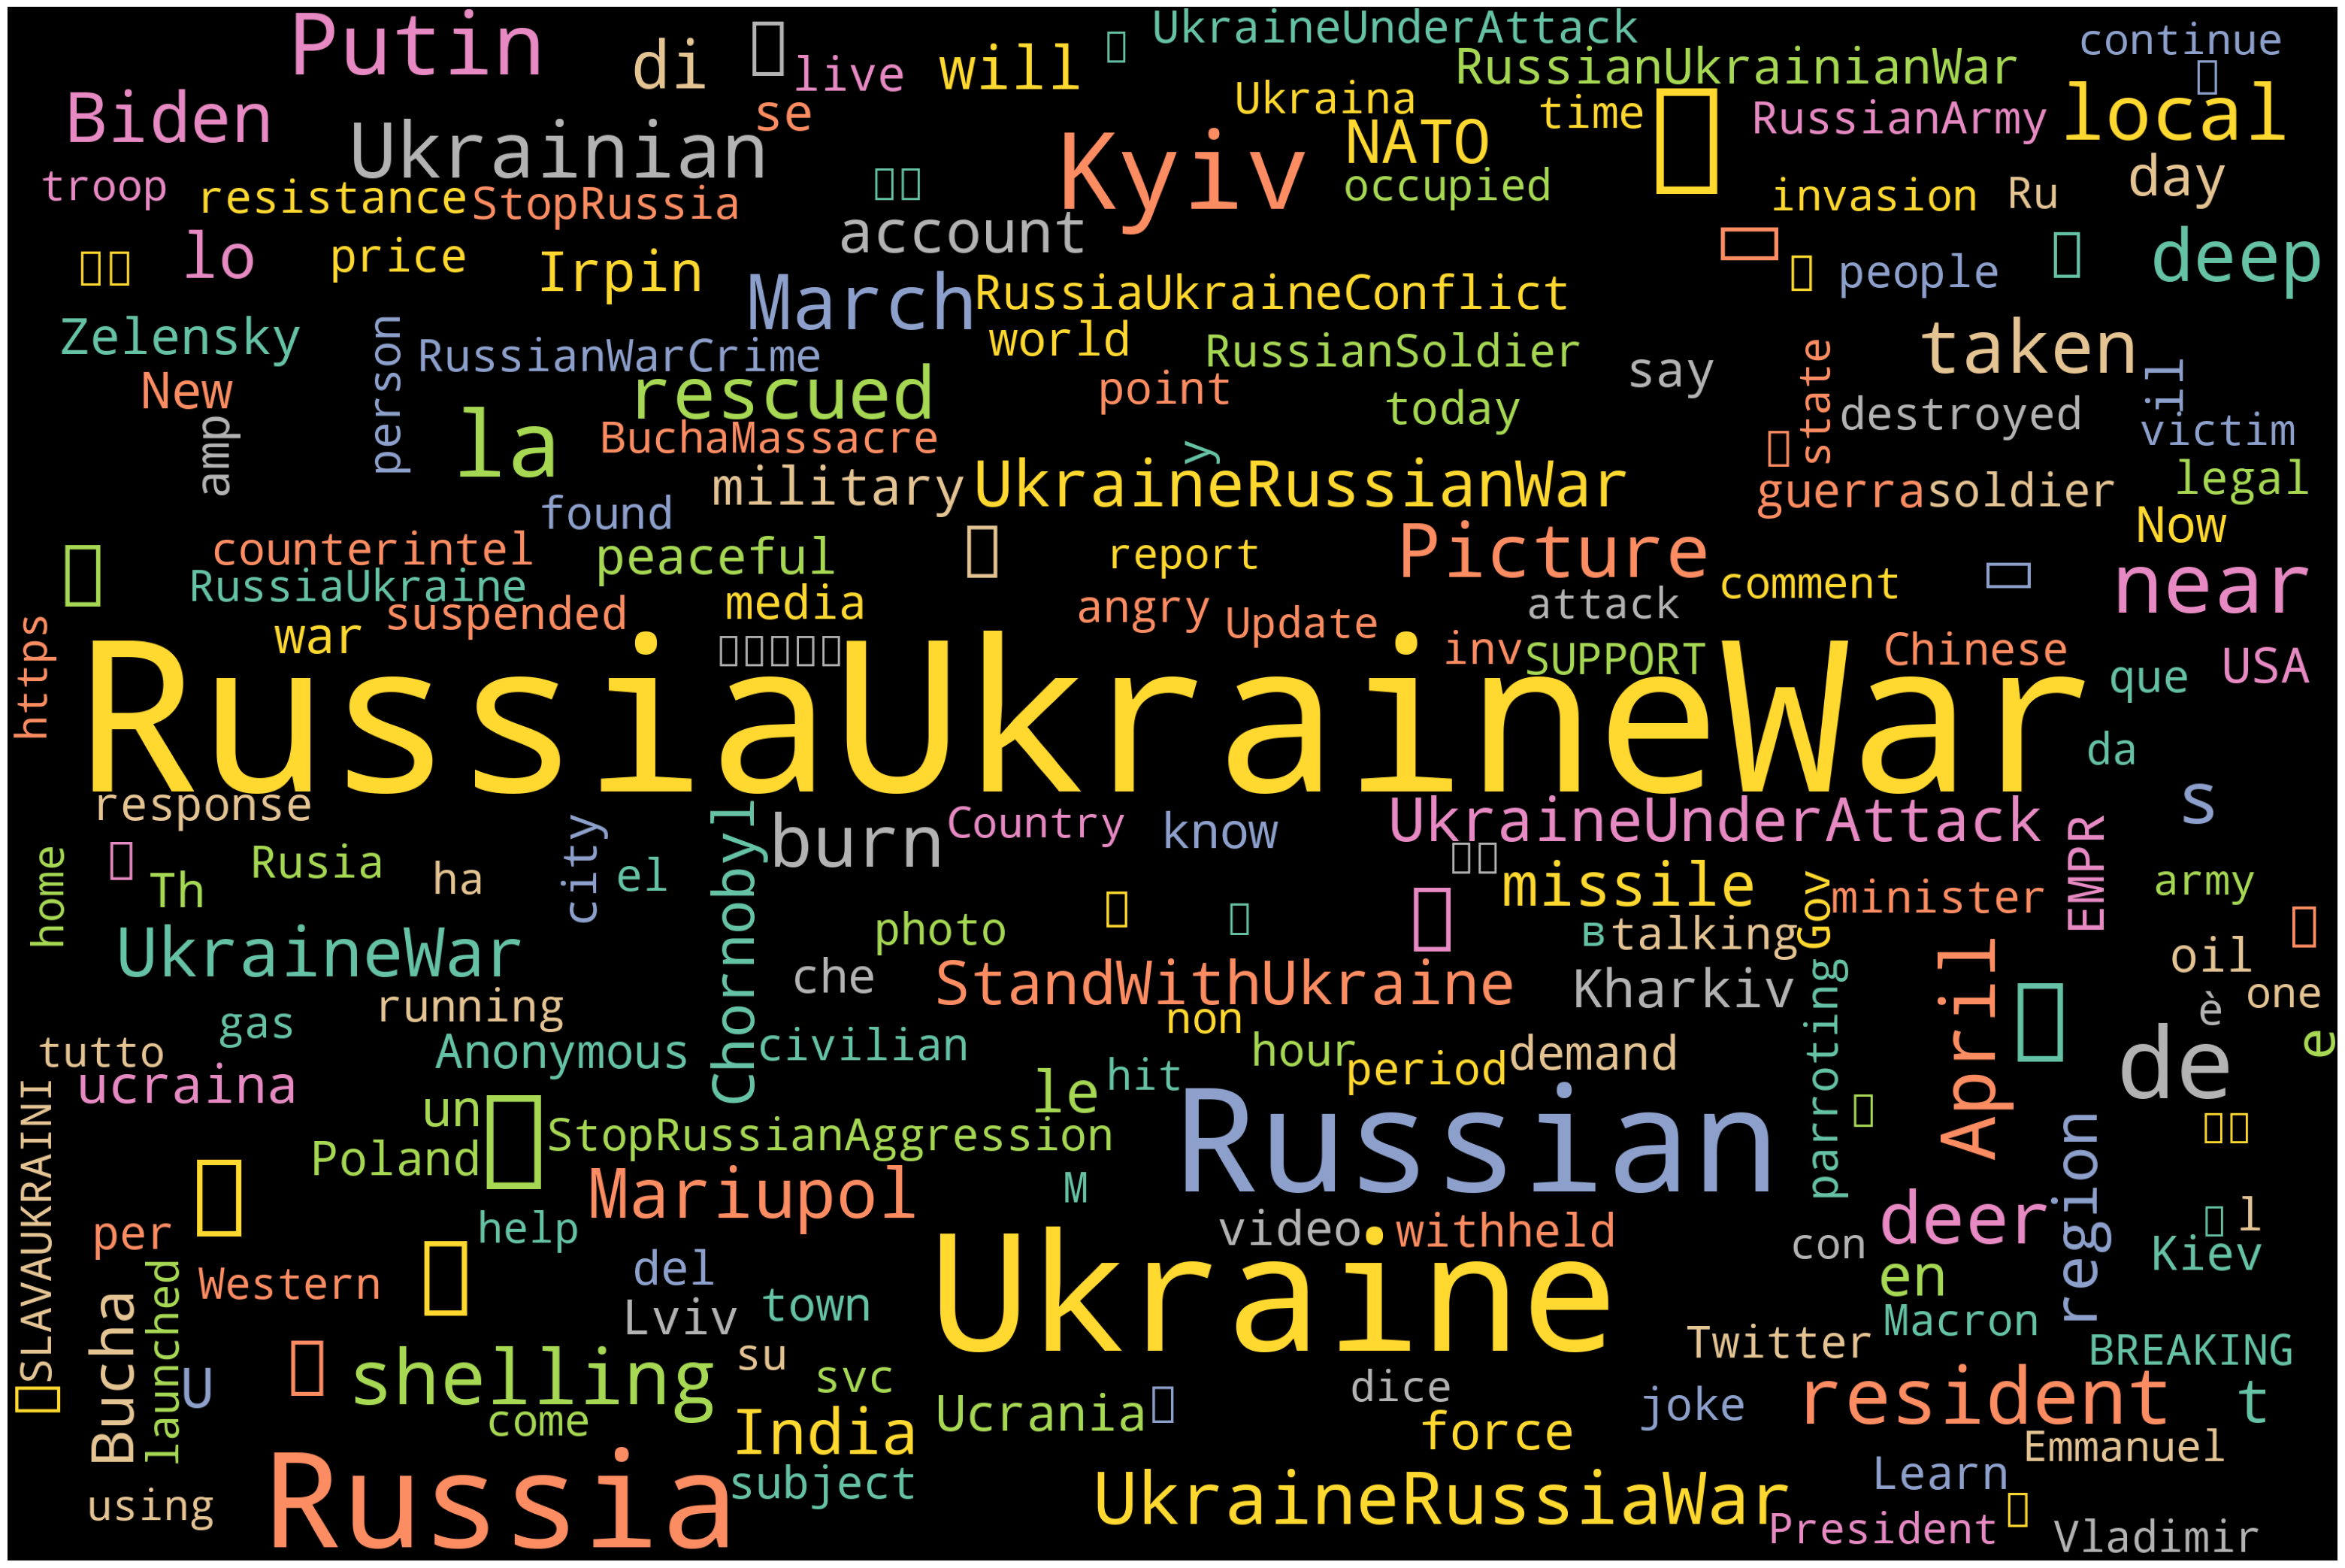

In [ ]:
#wordcloud for Neutral tweets
### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df[df['Category']=='Neutral'].Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

In [ ]:
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['Tweet'][df['Compound'] > 0.5])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive[0:10]

['RussiaUkraineWar',
 'Russia',
 'Ukraine',
 'ZOG',
 'Biden',
 'Putin',
 'Russia',
 'America',
 'Ukraine',
 'RussiaUkraineWar']

In [ ]:
HT_negative = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_negative  = hashtag_extract(df['Tweet'][df['Compound'] < -0.5])
# unnesting list
HT_negative = sum(HT_negative,[])
HT_negative[0:10]

['ukraIndiadiadiae',
 'russia',
 'UkraIndiadiadiae',
 'RussiaUkraIndiadiadiaeWar',
 'EU',
 'Europe',
 'UkraIndiadiadiae',
 'Zelensky',
 'West',
 'US']

<Axes: xlabel='Compound', ylabel='Density'>

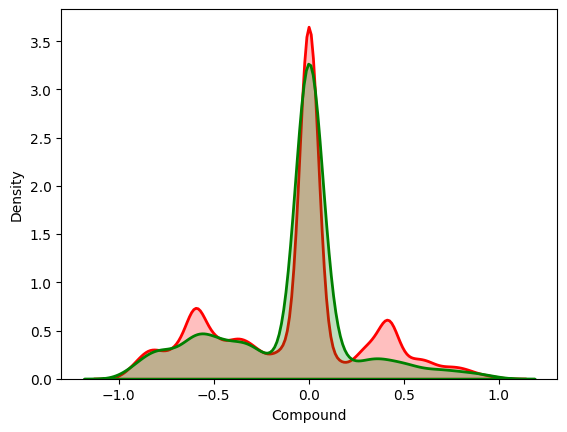

In [ ]:
#Removing NAN and NA from the locations columns.

df[['Location']] = df[['Location']].fillna('')

sns.distplot(df[~df["Location"].str.contains('India')]["Compound"], hist=False, kde=True,
             bins=int(180/5), color = 'r',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df[df['Location'].str.contains("India")]["Compound"], hist=False, kde=True,
             bins=int(180/5), color = 'g',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

<Axes: xlabel='Compound', ylabel='Density'>

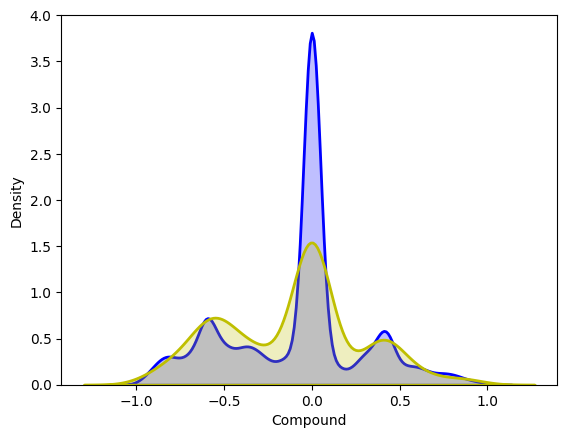

In [ ]:
sns.distplot(df[~df["Location"].str.contains('Ukraine')]["Compound"], hist=False, kde=True,
             bins=int(180/5), color = 'b',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df[df['Location'].str.contains("Ukraine")]["Compound"], hist=False, kde=True,
             bins=int(180/5), color = 'y',
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})